# Features exploration

All features given are numerical (including but not limited to boolean)

In [1]:
import pandas as pd


trainDf = pd.read_csv('train.csv')
trainDf.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'output'],
      dtype='object')

## Numerical data (Not including boolean)

- BMI
- GenHlth
- MentHlth
- PhysHlth
- Age
- Education
- Income

In [2]:
trainDf.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,output
count,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,...,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000
mean,0.513883,0.493653,0.972035,29.447441,0.473225,0.050377,0.133082,0.728877,0.616025,0.801666,...,0.085879,2.702102,3.617017,5.195954,0.207061,0.447441,8.376041,4.958548,5.852836,0.356010
std,0.499857,0.500009,0.164889,7.080019,0.499332,0.218743,0.339697,0.444583,0.486400,0.398785,...,0.280213,1.106379,7.997166,9.538762,0.405240,0.497279,2.920253,1.018217,2.131317,0.478866
min,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000,0.000000
50%,1.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000,0.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,5.000000,0.000000,1.000000,10.000000,6.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


In [3]:
CONTINUOUS_FEATURES = ["BMI", "Age"]
ORDINAL_FEATURES = ["GenHlth", "MentHlth", "PhysHlth", "Education", "Income"]

BOOLEAN_FEATURES = [
    col
    for col in trainDf.columns
    if col not in CONTINUOUS_FEATURES
    and col not in ORDINAL_FEATURES
    and col != "output"
]

print(f"Number of numerical features: {len(CONTINUOUS_FEATURES) + len(ORDINAL_FEATURES)}")
print(f"Number of boolean features: {len(BOOLEAN_FEATURES)}")

Number of numerical features: 7
Number of boolean features: 14


## Todo

Check outliner of BMI

In [4]:
import numpy as np
from pandas import DataFrame


class Outliner:
    def __init__(self):
        self.fitted = False

    def fit(self, df: DataFrame):
        self.Q1 = df.quantile(0.25)
        self.Q3 = df.quantile(0.75)
        self.IQR = self.Q3 - self.Q1
        self.fitted = True

    def transform(self, df):
        df = df.copy()
        df[((df < (self.Q1 - 1.5 * self.IQR)) | (df > (self.Q3 + 1.5 * self.IQR)))] = (
            np.nan
        )
        return df

    def fit_transform(self, df):
        self.fit(df)
        return self.transform(df)

# Normalize data

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


stdScaler = StandardScaler()
trainDf[CONTINUOUS_FEATURES] = stdScaler.fit_transform(trainDf[CONTINUOUS_FEATURES])

minMaxScaler = MinMaxScaler()
trainDf[ORDINAL_FEATURES] = minMaxScaler.fit_transform(trainDf[ORDINAL_FEATURES])

trainDf.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,output
count,5042.000000,5042.000000,5042.000000,5.042000e+03,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,...,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5.042000e+03,5042.000000,5042.000000,5042.000000
mean,0.513883,0.493653,0.972035,-2.113872e-16,0.473225,0.050377,0.133082,0.728877,0.616025,0.801666,...,0.085879,0.425526,0.120567,0.173198,0.207061,0.447441,-5.214217e-17,0.791710,0.693262,0.356010
std,0.499857,0.500009,0.164889,1.000099e+00,0.499332,0.218743,0.339697,0.444583,0.486400,0.398785,...,0.280213,0.276595,0.266572,0.317959,0.405240,0.497279,1.000099e+00,0.203643,0.304474,0.478866
min,0.000000,0.000000,0.000000,-2.182052e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.526073e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,-6.282303e-01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,-4.712529e-01,0.600000,0.428571,0.000000
50%,1.000000,0.000000,1.000000,-2.044606e-01,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,2.136872e-01,0.800000,0.714286,0.000000
75%,1.000000,1.000000,1.000000,5.018222e-01,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.500000,0.066667,0.166667,0.000000,1.000000,5.561573e-01,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,9.683498e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.583567e+00,1.000000,1.000000,1.000000


# Grammatical Evolution

In [6]:
# switch directory to use grape
%cd ../grape

# import grape and necessary functions
import grape
from algorithms import ge_eaSimpleWithElitism
from functions import pdiv


# switch back to the original directory
%cd -

/home/tu/code-py/evolutionary-computation/grape
/home/tu/code-py/evolutionary-computation/mid-project


## Parameters 

In [7]:
import random 


RANDOM_SEED = 1
random.seed(RANDOM_SEED)

POPULATION_SIZE = 1000
MAX_GENERATIONS = 100
P_CROSSOVER = 0.8
P_MUTATION = 0.01
HALLOFFAME_SIZE = max(round(0.01 * POPULATION_SIZE), 1)  # it should be at least 1
ELITE_SIZE = min(round(0.01 * POPULATION_SIZE), HALLOFFAME_SIZE)

CODON_CONSUMPTION = "lazy"
GENOME_REPRESENTATION = "list"
MAX_GENOME_LENGTH = None

MAX_INIT_TREE_DEPTH = 17
MIN_INIT_TREE_DEPTH = 5
MAX_TREE_DEPTH = 90
MAX_WRAPS = 0
CODON_SIZE = 255

REPORT_ITEMS = [
    "gen",
    "invalid",
    "avg",
    "std",
    "min",
    "max",
    "fitness_test",
    "best_ind_length",
    "avg_length",
    "best_ind_nodes",
    "avg_nodes",
    "best_ind_depth",
    "avg_depth",
    "avg_used_codons",
    "best_ind_used_codons",
    "selection_time",
    "generation_time",
]

## Gramma

In [8]:
grammar = grape.Grammar("./gramma.bnf")
grammar.production_rules

[[['add(<number_value>, <number_value>)', 'non-terminal', 2, 0, True, 3],
  ['sub(<number_value>, <number_value>)', 'non-terminal', 2, 1, True, 3],
  ['mul(<number_value>, <number_value>)', 'non-terminal', 2, 2, True, 3],
  ['div(<number_value>, <number_value>)', 'non-terminal', 2, 3, True, 3],
  ['abs(<number_value>)', 'non-terminal', 1, 4, True, 3],
  ['sigmoid(<number_value>)', 'non-terminal', 1, 5, True, 3],
  ['tanh(<number_value>)', 'non-terminal', 1, 6, True, 3],
  ['relu(<number_value>)', 'non-terminal', 1, 7, True, 3],
  ['swish(<number_value>)', 'non-terminal', 1, 8, True, 3],
  ['np.where((<logic_op>), (<number_value>), (<number_value>))',
   'non-terminal',
   3,
   9,
   True,
   3]],
 [['<compare_op>', 'non-terminal', 1, 0, True, 4],
  ['and_(<logic_op>, <logic_op>)', 'non-terminal', 2, 1, True, 3],
  ['or_(<logic_op>, <logic_op>)', 'non-terminal', 2, 2, True, 3],
  ['xor(<logic_op>, <logic_op>)', 'non-terminal', 2, 3, True, 3],
  ['not_(<logic_op>)', 'non-terminal', 1, 4

## Fitness function 

In [9]:
import numpy as np


MSE_WEIGHT = -6  # minimize
ACCURACY_WEIGHT = 3  # maximize
FEAT_USED_WEIGHT = 0.001  # maximize


# logic op
def and_(a, b):
    return np.logical_and(a, b)
def or_(a, b):
    return np.logical_or(a, b)
def xor(a, b):
    return np.logical_xor(a, b)
def not_(a):
    return np.logical_not(a)

# compare op
def greater_than(a, b):
    return (a > b)
def less_than(a, b):
    return (a < b)
def in_range(a, b, c):
    return np.logical_and(a > b, a < c)

# number op
def add(a, b):
    return (a + b)
def sub(a, b):
    return (a - b)
def mul(a, b):
    return (a * b)
def div(a, b):
    return pdiv(a, b)
def abs(a):
    return np.abs(a)
def sigmoid(a):
    return 1 / (1 + np.exp(-a))
def tanh(a):
    return np.tanh(a)
def relu(a):
    return np.maximum(0, a)
def swish(a):
    return a * sigmoid(a)


class GE_ExecuteError(Exception):
    # take a message as input
    def __init__(self, message="Error during the execution of the individual"):
        self.message = message
        super().__init__(self.message)
    pass

def gePredictProba(individual, nf, bf):
    """Predict if a case is positive or negative using ge and the individual.

    Args:
        individual (_type_): a valid GE individual
        nf (_type_): numerical features
        bf (_type_): boolean features

    Raises:
        GE_ExecuteError: if error happens during the execution of the individual

    Returns:
        float: the probability of the case being positive [0, 1]
    """

    nf = np.array(nf)
    bf = np.array(bf)

    assert nf.ndim == bf.ndim, "Numerical and Boolean data must have the same number of dimensions"

    # execute
    try:
        if nf.ndim == 1:
            res = eval(individual.phenotype)
            pred = 1 if res > 0 else 0
            return pred

        if nf.ndim == 2:
            assert nf.shape[0] == bf.shape[0], "Numerical and Boolean data must have the same number of samples"

            nf = nf.T
            bf = bf.T

            proba = eval(individual.phenotype)
            proba = sigmoid(proba)
            return proba

        raise NotImplementedError("Data with more than 2 dimensions is not supported")

    except (
        FloatingPointError,
        ZeroDivisionError,
        OverflowError,
        MemoryError,
        IndexError,
        TypeError,
    ) as e:
        raise GE_ExecuteError(str(e))

def gePredict(individual, nf, bf):
    proba = gePredictProba(individual, nf, bf)
    return np.round(proba).astype(int)

def featUsedFitness(individual, x):
    k = 0.7
    
    givenFeat = x.shape[1]
    x0 = givenFeat * k
    
    featUsed = 0
    for i in range(len(CONTINUOUS_FEATURES) + len(ORDINAL_FEATURES)):
        if f"nf[{i}]" in individual.phenotype:
            featUsed += 1
    for i in range(len(BOOLEAN_FEATURES)):
        if f"bf[{i}]" in individual.phenotype:
            featUsed += 1
            
    if featUsed > x0:
        featUsed = x0

    return np.log10(1 + featUsed)

def errorRateFitness(individual, x, Y) -> float:
    nf = x[CONTINUOUS_FEATURES + ORDINAL_FEATURES].to_numpy()
    bf = x[BOOLEAN_FEATURES].to_numpy()

    proba = gePredictProba(individual, nf, bf)
    
    mse = np.mean((Y - proba) ** 2)

    return mse

def accuracyFitness(individual, x, Y) -> float:
    nf = x[CONTINUOUS_FEATURES + ORDINAL_FEATURES].to_numpy()
    bf = x[BOOLEAN_FEATURES].to_numpy()

    pred = gePredict(individual, nf, bf)

    acc = np.mean(Y == pred)

    return acc

def fitness(individual, points):
    INVALID = tuple([np.nan] * 3)

    if individual.invalid:
        return INVALID

    x, Y = points

    featFitness = featUsedFitness(individual, x)

    try:
        errRate = errorRateFitness(individual, x, Y)
    except GE_ExecuteError:
        return INVALID

    accuracy = accuracyFitness(individual, x, Y)
    
    combinedFitness = errRate * MSE_WEIGHT + featFitness * FEAT_USED_WEIGHT

    return (errRate, accuracy, featFitness)

## Train

### Toolbox

In [10]:
from deap import creator, base, tools

toolbox = base.Toolbox()

creator.create("Fitness", base.Fitness, weights=(
    # abs(MSE_WEIGHT) + abs(ACCURACY_WEIGHT) + abs(FEAT_USED_WEIGHT), 
    MSE_WEIGHT, 
    ACCURACY_WEIGHT, 
    FEAT_USED_WEIGHT
))
creator.create("Individual", grape.Individual, fitness=creator.Fitness)

toolbox.register("populationCreator", grape.sensible_initialisation, creator.Individual)
toolbox.register("evaluate", fitness)
toolbox.register("select", tools.selTournament, tournsize=7)  # nsga2
toolbox.register("mate", grape.crossover_onepoint)
toolbox.register("mutate", grape.mutation_int_flip_per_codon)

### Data

In [11]:
# train data
X_train = trainDf.drop(columns=["output"])
y_train = trainDf["output"].to_numpy()



In [12]:
# population and hall of fame:
population = toolbox.populationCreator(
    pop_size=POPULATION_SIZE,
    bnf_grammar=grammar,
    min_init_depth=MIN_INIT_TREE_DEPTH,
    max_init_depth=MAX_INIT_TREE_DEPTH,
    codon_size=CODON_SIZE,
    codon_consumption=CODON_CONSUMPTION,
    genome_representation=GENOME_REPRESENTATION,
)
hof = tools.HallOfFame(HALLOFFAME_SIZE)

# prepare the statistics object:
stats_fit = tools.Statistics(lambda ind: ind.fitness.values[0])
stats_feat_used = tools.Statistics(lambda ind: ind.fitness.values[1])

stats = tools.MultiStatistics(fitness=stats_fit, feat_used=stats_feat_used)
stats.register("avg", np.nanmean)
stats.register("std", np.nanstd)
stats.register("min", np.nanmin)
stats.register("max", np.nanmax)

# run the algorithm:
population, logbook = ge_eaSimpleWithElitism(
    population,
    toolbox,
    cxpb=P_CROSSOVER,
    mutpb=P_MUTATION,
    ngen=MAX_GENERATIONS,
    elite_size=ELITE_SIZE,
    bnf_grammar=grammar,
    codon_size=CODON_SIZE,
    max_tree_depth=MAX_TREE_DEPTH,
    max_genome_length=MAX_GENOME_LENGTH,
    points_train=[X_train, y_train],
    # points_test=[X_test, y_test],
    codon_consumption=CODON_CONSUMPTION,
    report_items=REPORT_ITEMS,
    genome_representation=GENOME_REPRESENTATION,
    stats=stats,
    halloffame=hof,
    verbose=False,
)

/home/tu/code-py/evolutionary-computation/grape/algorithms.py:124: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid them.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid them.")


gen = 0 , Best fitness = (np.float64(0.20762338497516478), np.float64(0.6806822689408966), np.float64(0.47712125471966244))


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 1 , Best fitness = (np.float64(0.20762338497516478), np.float64(0.6806822689408966), np.float64(0.47712125471966244)) , Number of invalids = 299


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 2 , Best fitness = (np.float64(0.20679106383308388), np.float64(0.6777072590241967), np.float64(0.47712125471966244)) , Number of invalids = 248


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 3 , Best fitness = (np.float64(0.20679106383308388), np.float64(0.6777072590241967), np.float64(0.47712125471966244)) , Number of invalids = 199


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 4 , Best fitness = (np.float64(0.20290654085262305), np.float64(0.6836572788575962), np.float64(0.9030899869919435)) , Number of invalids = 207


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 5 , Best fitness = (np.float64(0.20290654085262305), np.float64(0.6836572788575962), np.float64(0.9542425094393249)) , Number of invalids = 181


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 6 , Best fitness = (np.float64(0.20290654085262305), np.float64(0.6836572788575962), np.float64(0.9542425094393249)) , Number of invalids = 150


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 7 , Best fitness = (np.float64(0.20045638431689236), np.float64(0.6905989686632289), np.float64(0.6020599913279624)) , Number of invalids = 119


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 8 , Best fitness = (np.float64(0.20045638431689236), np.float64(0.6905989686632289), np.float64(0.6020599913279624)) , Number of invalids = 123


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 9 , Best fitness = (np.float64(0.1998424921548891), np.float64(0.690003966679889), np.float64(0.6020599913279624)) , Number of invalids = 139


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 10 , Best fitness = (np.float64(0.19939468394162532), np.float64(0.6909956366521222), np.float64(0.47712125471966244)) , Number of invalids = 114


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 11 , Best fitness = (np.float64(0.19939468394162532), np.float64(0.6909956366521222), np.float64(0.47712125471966244)) , Number of invalids = 98


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 12 , Best fitness = (np.float64(0.1960178873999355), np.float64(0.696152320507735), np.float64(0.6989700043360189)) , Number of invalids = 76


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 13 , Best fitness = (np.float64(0.1960178873999355), np.float64(0.696152320507735), np.float64(0.6989700043360189)) , Number of invalids = 46


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 14 , Best fitness = (np.float64(0.1960178873999355), np.float64(0.696152320507735), np.float64(0.6989700043360189)) , Number of invalids = 36


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 15 , Best fitness = (np.float64(0.19591832239266868), np.float64(0.6983339944466481), np.float64(0.6989700043360189)) , Number of invalids = 43


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 16 , Best fitness = (np.float64(0.1955404600290462), np.float64(0.6991273304244348), np.float64(1.1958996524092338)) , Number of invalids = 69


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 17 , Best fitness = (np.float64(0.1955404600290462), np.float64(0.6991273304244348), np.float64(1.1958996524092338)) , Number of invalids = 103


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 18 , Best fitness = (np.float64(0.1955404600290462), np.float64(0.6991273304244348), np.float64(1.1958996524092338)) , Number of invalids = 156


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 19 , Best fitness = (np.float64(0.19462205223715548), np.float64(0.6993256644188813), np.float64(1.0)) , Number of invalids = 196


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 20 , Best fitness = (np.float64(0.19223195378979), np.float64(0.702300674335581), np.float64(0.6989700043360189)) , Number of invalids = 184


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 21 , Best fitness = (np.float64(0.19223195378979), np.float64(0.702300674335581), np.float64(0.6989700043360189)) , Number of invalids = 201


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 22 , Best fitness = (np.float64(0.19223195378979), np.float64(0.702300674335581), np.float64(0.6989700043360189)) , Number of invalids = 219


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 23 , Best fitness = (np.float64(0.1910746764253226), np.float64(0.7084490281634274), np.float64(0.6989700043360189)) , Number of invalids = 259


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 24 , Best fitness = (np.float64(0.1910746764253226), np.float64(0.7084490281634274), np.float64(0.6989700043360189)) , Number of invalids = 252


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 25 , Best fitness = (np.float64(0.1910746764253226), np.float64(0.7084490281634274), np.float64(0.6989700043360189)) , Number of invalids = 243


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 26 , Best fitness = (np.float64(0.1910723237499705), np.float64(0.7084490281634274), np.float64(0.6989700043360189)) , Number of invalids = 247


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 27 , Best fitness = (np.float64(0.18968056368464434), np.float64(0.7058706862356208), np.float64(0.6989700043360189)) , Number of invalids = 226


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 28 , Best fitness = (np.float64(0.18968056368464434), np.float64(0.7058706862356208), np.float64(0.6989700043360189)) , Number of invalids = 242


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 29 , Best fitness = (np.float64(0.18968056368464434), np.float64(0.7058706862356208), np.float64(0.6989700043360189)) , Number of invalids = 223


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 30 , Best fitness = (np.float64(0.18968056368464434), np.float64(0.7058706862356208), np.float64(0.6989700043360189)) , Number of invalids = 257


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 31 , Best fitness = (np.float64(0.18730379585575277), np.float64(0.7070606902023006), np.float64(0.7781512503836436)) , Number of invalids = 266


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 32 , Best fitness = (np.float64(0.18730379585575277), np.float64(0.7070606902023006), np.float64(0.7781512503836436)) , Number of invalids = 195


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 33 , Best fitness = (np.float64(0.18709277480066897), np.float64(0.71479571598572), np.float64(0.7781512503836436)) , Number of invalids = 176


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 34 , Best fitness = (np.float64(0.18584941404784758), np.float64(0.7120190400634668), np.float64(0.8450980400142568)) , Number of invalids = 141


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 35 , Best fitness = (np.float64(0.18584941404784758), np.float64(0.7120190400634668), np.float64(0.8450980400142568)) , Number of invalids = 140


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 36 , Best fitness = (np.float64(0.18584941404784758), np.float64(0.7120190400634668), np.float64(0.8450980400142568)) , Number of invalids = 117


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 37 , Best fitness = (np.float64(0.18522100901707236), np.float64(0.7128123760412534), np.float64(0.7781512503836436)) , Number of invalids = 122


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 38 , Best fitness = (np.float64(0.18424516921317066), np.float64(0.7157873859579532), np.float64(0.8450980400142568)) , Number of invalids = 112


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 39 , Best fitness = (np.float64(0.18374584585630652), np.float64(0.7177707259024196), np.float64(0.8450980400142568)) , Number of invalids = 99


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 40 , Best fitness = (np.float64(0.18200322399778743), np.float64(0.7203490678302261), np.float64(0.7781512503836436)) , Number of invalids = 102


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 41 , Best fitness = (np.float64(0.18200322399778743), np.float64(0.7203490678302261), np.float64(0.7781512503836436)) , Number of invalids = 119


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 42 , Best fitness = (np.float64(0.18200322399778743), np.float64(0.7203490678302261), np.float64(0.7781512503836436)) , Number of invalids = 114


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 43 , Best fitness = (np.float64(0.18134926788235906), np.float64(0.722134073780246), np.float64(1.1139433523068367)) , Number of invalids = 98


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 44 , Best fitness = (np.float64(0.18134926788235906), np.float64(0.722134073780246), np.float64(1.1139433523068367)) , Number of invalids = 104


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 45 , Best fitness = (np.float64(0.18131687271956132), np.float64(0.7217374057913526), np.float64(0.9030899869919435)) , Number of invalids = 121


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 46 , Best fitness = (np.float64(0.18089245909931362), np.float64(0.7211424038080126), np.float64(1.1958996524092338)) , Number of invalids = 120


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 47 , Best fitness = (np.float64(0.1803009246713724), np.float64(0.728282427608092), np.float64(0.7781512503836436)) , Number of invalids = 160


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 48 , Best fitness = (np.float64(0.17989368412366688), np.float64(0.7241174137247124), np.float64(0.7781512503836436)) , Number of invalids = 202


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 49 , Best fitness = (np.float64(0.17989368412366688), np.float64(0.7241174137247124), np.float64(0.7781512503836436)) , Number of invalids = 252


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 50 , Best fitness = (np.float64(0.17989368412366688), np.float64(0.7241174137247124), np.float64(0.7781512503836436)) , Number of invalids = 246


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 51 , Best fitness = (np.float64(0.17970828415674822), np.float64(0.7290757635858786), np.float64(0.8450980400142568)) , Number of invalids = 234


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 52 , Best fitness = (np.float64(0.17937882328469082), np.float64(0.7298690995636652), np.float64(0.7781512503836436)) , Number of invalids = 243


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 53 , Best fitness = (np.float64(0.17937882328469082), np.float64(0.7298690995636652), np.float64(0.7781512503836436)) , Number of invalids = 191


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 54 , Best fitness = (np.float64(0.17937882328469082), np.float64(0.7298690995636652), np.float64(0.8450980400142568)) , Number of invalids = 170


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 55 , Best fitness = (np.float64(0.17937882328469082), np.float64(0.7298690995636652), np.float64(0.8450980400142568)) , Number of invalids = 174


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 56 , Best fitness = (np.float64(0.17937882328469082), np.float64(0.7298690995636652), np.float64(0.8450980400142568)) , Number of invalids = 152


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 57 , Best fitness = (np.float64(0.17913806268619392), np.float64(0.7292740975803252), np.float64(0.7781512503836436)) , Number of invalids = 150


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning:

gen = 58 , Best fitness = (np.float64(0.17913806268619392), np.float64(0.7292740975803252), np.float64(0.7781512503836436)) , Number of invalids = 156


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 59 , Best fitness = (np.float64(0.17913806268619392), np.float64(0.7292740975803252), np.float64(0.7781512503836436)) , Number of invalids = 152


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 60 , Best fitness = (np.float64(0.17913806268619392), np.float64(0.7292740975803252), np.float64(0.7781512503836436)) , Number of invalids = 145


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 61 , Best fitness = (np.float64(0.17913806268619392), np.float64(0.7292740975803252), np.float64(0.7781512503836436)) , Number of invalids = 172


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 62 , Best fitness = (np.float64(0.1781028021687626), np.float64(0.7344307814359382), np.float64(0.9542425094393249)) , Number of invalids = 196


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 63 , Best fitness = (np.float64(0.1781028021687626), np.float64(0.7344307814359382), np.float64(0.9542425094393249)) , Number of invalids = 211


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 64 , Best fitness = (np.float64(0.1781028021687626), np.float64(0.7344307814359382), np.float64(0.9542425094393249)) , Number of invalids = 193


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning:

gen = 65 , Best fitness = (np.float64(0.1781028021687626), np.float64(0.7344307814359382), np.float64(0.9542425094393249)) , Number of invalids = 186


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 66 , Best fitness = (np.float64(0.1781028021687626), np.float64(0.7344307814359382), np.float64(0.9542425094393249)) , Number of invalids = 188


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 67 , Best fitness = (np.float64(0.1781028021687626), np.float64(0.7344307814359382), np.float64(0.9542425094393249)) , Number of invalids = 151


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 68 , Best fitness = (np.float64(0.1781028021687626), np.float64(0.7344307814359382), np.float64(0.9542425094393249)) , Number of invalids = 151


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 69 , Best fitness = (np.float64(0.1779240730343066), np.float64(0.7336374454581516), np.float64(0.9030899869919435)) , Number of invalids = 119


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 70 , Best fitness = (np.float64(0.1779240730343066), np.float64(0.7336374454581516), np.float64(0.9030899869919435)) , Number of invalids = 95


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 71 , Best fitness = (np.float64(0.1779240730343066), np.float64(0.7336374454581516), np.float64(0.9030899869919435)) , Number of invalids = 103


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 72 , Best fitness = (np.float64(0.1779240730343066), np.float64(0.7336374454581516), np.float64(0.9030899869919435)) , Number of invalids = 115


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 73 , Best fitness = (np.float64(0.17770665601242186), np.float64(0.7342324474414915), np.float64(0.9542425094393249)) , Number of invalids = 127


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 74 , Best fitness = (np.float64(0.17770665601242186), np.float64(0.7342324474414915), np.float64(0.9542425094393249)) , Number of invalids = 134


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 75 , Best fitness = (np.float64(0.17770665601242186), np.float64(0.7342324474414915), np.float64(0.9542425094393249)) , Number of invalids = 169


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 76 , Best fitness = (np.float64(0.17764340075984342), np.float64(0.7314557715192384), np.float64(0.9542425094393249)) , Number of invalids = 166


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 77 , Best fitness = (np.float64(0.17764340075984342), np.float64(0.7314557715192384), np.float64(0.9542425094393249)) , Number of invalids = 182


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 78 , Best fitness = (np.float64(0.17764340075984342), np.float64(0.7314557715192384), np.float64(0.9542425094393249)) , Number of invalids = 201


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 79 , Best fitness = (np.float64(0.1774096623650894), np.float64(0.7370091233637446), np.float64(0.9542425094393249)) , Number of invalids = 188


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 80 , Best fitness = (np.float64(0.1774096623650894), np.float64(0.7370091233637446), np.float64(0.9542425094393249)) , Number of invalids = 178


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 81 , Best fitness = (np.float64(0.1774096623650894), np.float64(0.7370091233637446), np.float64(0.9542425094393249)) , Number of invalids = 155


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 82 , Best fitness = (np.float64(0.1774096623650894), np.float64(0.7370091233637446), np.float64(0.9542425094393249)) , Number of invalids = 167


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 83 , Best fitness = (np.float64(0.1774096623650894), np.float64(0.7370091233637446), np.float64(0.9542425094393249)) , Number of invalids = 185


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 84 , Best fitness = (np.float64(0.17688809930627591), np.float64(0.7366124553748512), np.float64(0.9542425094393249)) , Number of invalids = 166


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 85 , Best fitness = (np.float64(0.17688809930627591), np.float64(0.7366124553748512), np.float64(0.9542425094393249)) , Number of invalids = 184


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 86 , Best fitness = (np.float64(0.17684590857857693), np.float64(0.7352241174137247), np.float64(0.9542425094393249)) , Number of invalids = 197


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 87 , Best fitness = (np.float64(0.17684590857857693), np.float64(0.7352241174137247), np.float64(0.9542425094393249)) , Number of invalids = 233


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 88 , Best fitness = (np.float64(0.17658596694765774), np.float64(0.7364141213804046), np.float64(0.9542425094393249)) , Number of invalids = 249


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 89 , Best fitness = (np.float64(0.17658596694765774), np.float64(0.7364141213804046), np.float64(0.9542425094393249)) , Number of invalids = 238


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 90 , Best fitness = (np.float64(0.17658596694765774), np.float64(0.7364141213804046), np.float64(0.9542425094393249)) , Number of invalids = 235


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 91 , Best fitness = (np.float64(0.17658596694765774), np.float64(0.7364141213804046), np.float64(0.9542425094393249)) , Number of invalids = 241


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 92 , Best fitness = (np.float64(0.174820752676516), np.float64(0.7374057913526378), np.float64(0.9542425094393249)) , Number of invalids = 230


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 93 , Best fitness = (np.float64(0.174820752676516), np.float64(0.7374057913526378), np.float64(0.9542425094393249)) , Number of invalids = 230


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 94 , Best fitness = (np.float64(0.174820752676516), np.float64(0.7374057913526378), np.float64(0.9542425094393249)) , Number of invalids = 211


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 95 , Best fitness = (np.float64(0.174820752676516), np.float64(0.7374057913526378), np.float64(0.9542425094393249)) , Number of invalids = 224


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 96 , Best fitness = (np.float64(0.174820752676516), np.float64(0.7374057913526378), np.float64(0.9542425094393249)) , Number of invalids = 240


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 97 , Best fitness = (np.float64(0.174820752676516), np.float64(0.7374057913526378), np.float64(0.9542425094393249)) , Number of invalids = 238


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 98 , Best fitness = (np.float64(0.174820752676516), np.float64(0.7374057913526378), np.float64(0.9542425094393249)) , Number of invalids = 233


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 99 , Best fitness = (np.float64(0.17325769875325292), np.float64(0.7467274890916303), np.float64(0.9542425094393249)) , Number of invalids = 253
gen = 100 , Best fitness = (np.float64(0.17230054871809175), np.float64(0.7403808012693376), np.float64(1.041392685158225)) , Number of invalids = 256


/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_589320/2399401147.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


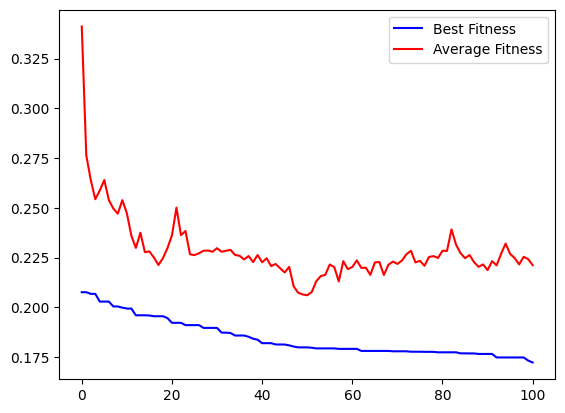

In [19]:
from matplotlib import pyplot as plt

chapter_fitness = logbook.chapters["fitness"]

gen = chapter_fitness.select("gen")
fit_mins = chapter_fitness.select("min")
fit_avgs = chapter_fitness.select("avg")

plt.plot(gen, fit_mins, "b-", label="Best Fitness")
plt.plot(gen, fit_avgs, "r-", label="Average Fitness")
plt.legend()

## Best Individual

In [22]:
import textwrap

best = hof.items[0].phenotype
print("Best individual: \n", "\n".join(textwrap.wrap(best, 80)))
print("\nTraining Fitness: ", hof.items[0].fitness.values[0])

Best individual: 
 sub(nf[0], add(swish(sub(sub(np.where((bf[9]), (nf[5]), (nf[0])), nf[1]),
bf[1])), np.where((bf[0]), (sub(np.where((bf[1]), (nf[6]), (swish(1.0309))),
nf[2])), (add(in_range(np.where((bf[1]), (np.where((bf[0]),
(sub(np.where((bf[1]), (nf[6]), (swish(1.0109))), nf[6])), (1.1021))),
(np.where((bf[1]), (nf[6]), (swish(1.0101))))), sub(np.where((bf[3]), (nf[5]),
(nf[2])), nf[1]), bf[1]), sub(np.where((bf[1]), (np.where((bf[0]),
(sub(np.where((bf[1]), (nf[6]), (swish(1.0109))), nf[2])), (1.3027))),
(add(sub(np.where((bf[1]), (nf[3]), (np.where((bf[1]), (nf[6]),
(swish(1.0309))))), nf[2]), 1.0109))), nf[2]))))))

Training Fitness:  0.17230054871809175


In [23]:
hof.items[1].fitness.values

(np.float64(0.17304347494555397),
 np.float64(0.7487108290360968),
 np.float64(0.9542425094393249))

In [15]:
print(hof.items[0].phenotype, file=open("best_individual.txt", "w+"))

### Predict

In [16]:
# test data 
testDf = pd.read_csv('test.csv')
testDf[CONTINUOUS_FEATURES] = stdScaler.transform(testDf[CONTINUOUS_FEATURES])
testDf[ORDINAL_FEATURES] = minMaxScaler.transform(testDf[ORDINAL_FEATURES])

X_test = testDf

nf = X_test[CONTINUOUS_FEATURES + ORDINAL_FEATURES].to_numpy()
bf = X_test[BOOLEAN_FEATURES].to_numpy()

res: list = gePredict(hof.items[0], nf, bf) # type: ignore

In [17]:
# make df of index, output; index [0...n-1]; output is above

outputDf = pd.DataFrame(res, columns=["output"])
outputDf["index"] = outputDf.index

outputDf = outputDf[["index", "output"]]

outputDf.to_csv("submission.csv", index=False)

